In [78]:
import pandas as pd
import numpy as np
from tensorflow.keras import datasets,models,layers
import seaborn as sn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

### Load Dataset

In [79]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [80]:
X_train.shape

(60000, 28, 28)

In [81]:
X_test.shape

(10000, 28, 28)

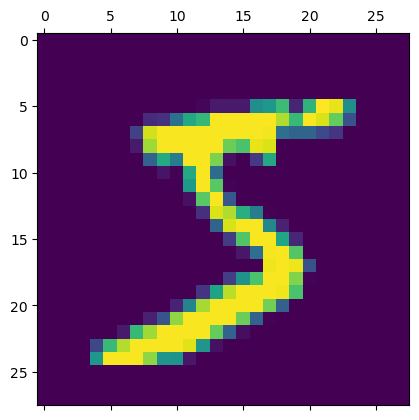

This image is represent number  5


In [82]:
# plot any sample >>>> 
plt.matshow(X_train[0])
plt.show()
print("This image is represent number ",y_train[0])

In [83]:
# Normalization
X_train = X_train / 255
X_test = X_test / 255

In [84]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [85]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [86]:
X_train.shape

(60000, 28, 28, 1)

In [87]:
CNN=models.Sequential([
    layers.Conv2D(filters=6,kernel_size=(5,5),strides=(1, 1),input_shape=(28,28,1),activation='relu'),
    layers.MaxPooling2D((2,2), strides=(2, 2)),
    
    layers.Conv2D(filters=16,kernel_size=(5,5),strides=(1, 1),activation='relu'),
    layers.MaxPooling2D((2,2), strides=(2, 2)),
    
    layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [88]:
CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [89]:
CNN.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1866 - accuracy: 0.9417
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0627 - accuracy: 0.9800
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0457 - accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0361 - accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0296 - accuracy: 0.9902
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0234 - accuracy: 0.9923
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0216 - accuracy: 0.9931
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0173 - accuracy: 0.9945
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0162 - accuracy: 0.9948
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.015

In [90]:
CNN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0476 - accuracy: 0.9886


[0.04761004075407982, 0.9886000156402588]

### Model Architecture

In [91]:
CNN.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 12, 12, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 4, 4, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 120)              

In [92]:
for layer in CNN.layers:
    print(layer.name,layer.trainable,': Total Trainable Parameters:', layer.count_params())

conv2d_12 True : Total Trainable Parameters: 156
max_pooling2d_12 True : Total Trainable Parameters: 0
conv2d_13 True : Total Trainable Parameters: 2416
max_pooling2d_13 True : Total Trainable Parameters: 0
flatten_6 True : Total Trainable Parameters: 0
dense_17 True : Total Trainable Parameters: 30840
dense_18 True : Total Trainable Parameters: 10164
dense_19 True : Total Trainable Parameters: 850


### Confusion Matrix

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

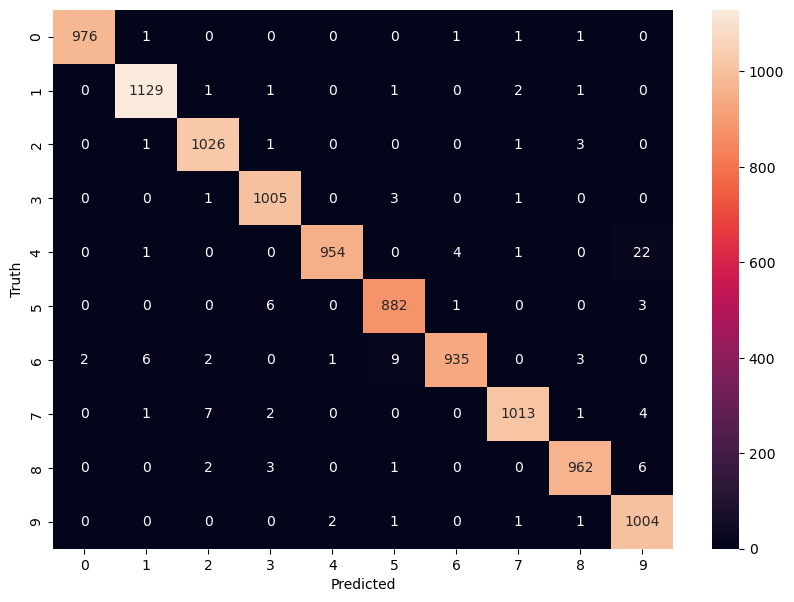

In [93]:
y_pred = CNN.predict(X_test)
y_pred_labels=[np.argmax(element) for element in y_pred]#returns the index of the highest probability.
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [94]:
print("Classification Report: \n", classification_report(y_test, y_pred_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.97      0.98       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.97      1.00      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

